In [2]:
import matplotlib.pyplot as plt
import math

In [3]:
# initial_tree
w = "F"
production = lambda tree: tree.replace("F", "FF-[-F+F+F]+[+F-F-F]") 
delta = math.radians(22.5)
l = 1
n = 4

In [4]:
def create_line_segments_from_bracketed_ol_system(axial_tree_string, delta, l):
    (x0, y0) = (0, 0)
    line_segments = [((x0, y0), (x0, y0))]
    states = [((x0, y0), math.radians(90))]
    current_state = states[0]
    for c in axial_tree_string:
        if c == 'F':
            current_point = current_state[0]
            new_point = (current_point[0] + l*math.cos(current_state[1]), current_point[1] + l*math.sin(current_state[1]))
            line_segments.append((current_point, new_point))
            current_state = ((new_point), current_state[1])
        if c == '[':
            states.append(current_state)
        if c == ']':
            current_state = states.pop()
        if  c == '+':
            temp_state = current_state
            current_state = (temp_state[0], current_state[1] + delta)
        if  c == '-':
            temp_state = current_state
            current_state = (temp_state[0], current_state[1] - delta)
    return line_segments

In [5]:
list_of_trees = [w]
for i in range(n):
    list_of_trees.append(production(list_of_trees[-1]))

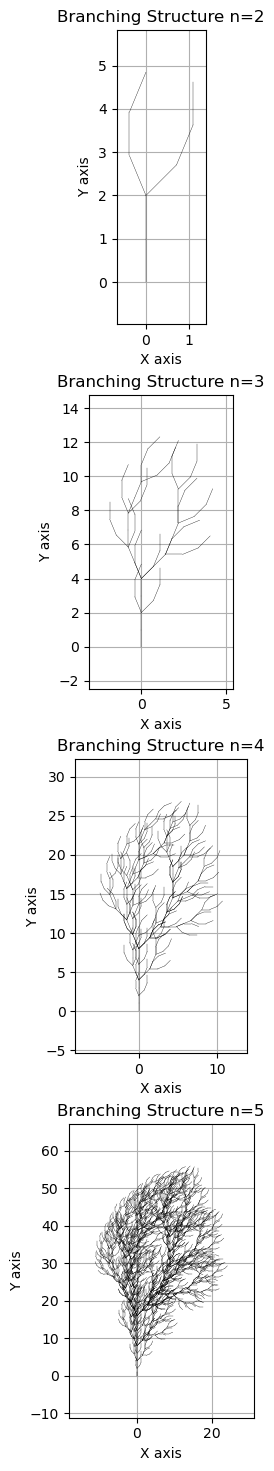

In [6]:
def plot_line_segment(start_point, end_point, ax):
    """Plot a line segment between two points."""
    x_values = [start_point[0], end_point[0]]
    y_values = [start_point[1], end_point[1]]
    ax.plot(x_values, y_values, color='black', linewidth=.25)  # You can specify different colors

# Set up multiple subplots

fig, axs = plt.subplots(nrows=n, figsize=(5, 15))  # Adjust figure size as needed
fig.tight_layout(pad=3.0)  # Add space between plots

for index, tree in enumerate(list_of_trees):
    line_segments = create_line_segments_from_bracketed_ol_system(tree, delta, l)
    ax = axs[index - 1]
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title(f'Branching Structure n={index+1}')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')

    # Plot each branch for this subplot
    for line_segment in line_segments:
        plot_line_segment(line_segment[0], line_segment[1], ax)

    ax.relim()
    ax.autoscale_view()
    ax.margins(x=0.2, y=0.2)  # Adds 5% padding to the x and y axes


# Show plot
plt.show()